# Prep stuff

In [2]:
drive_path = 'd:/'
import numpy as np
import pandas as pd
import os
import sys
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import variation
import h5py

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.brain_observatory.stimulus_analysis import StimulusAnalysis
from allensdk.brain_observatory.findlevel import findlevel

manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

In [4]:
#only get the sessions that contain the natural scenes: 79 sessions
expMetaData = pd.DataFrame(boc.get_ophys_experiments())
SessionThreeMD = expMetaData[expMetaData.session_type=='three_session_B']

In [398]:
#Gives you all of the relevant experiment containers
#SessionThreeMD.sort_values('experiment_container_id')

In [399]:
#SessionThreeMD.to_csv('SessionThreeMD.csv',index=False)

# Pull the dataframe from the hd5 file

# CHANGE

In [20]:
expID=507691834
df=pd.read_hdf('D:\BrainObservatory\ophys_analysis\%d_three_session_B_analysis.h5'%(expID),'analysis/peak')

df.response_variability_ns

0      34
1      10
2      12
3       2
4       4
5      38
6      20
7      76
8      18
9       8
10     18
11     42
12     14
13     20
14     24
15     20
16     12
17     12
18     10
19     20
20     14
21     64
22      4
23     10
24     26
25     26
26     50
27     18
28     12
29     14
       ..
274    56
275    20
276    38
277    10
278    26
279    10
280    46
281    18
282    18
283    22
284    36
285     6
286     4
287    10
288    30
289    32
290    38
291    14
292    24
293    24
294     8
295    24
296    26
297    34
298    24
299    26
300    12
301    24
302    10
303    18
Name: response_variability_ns, dtype: object

In [400]:
expID=507691834
df=pd.read_hdf('D:\BrainObservatory\ophys_analysis\%d_three_session_B_analysis.h5'%(expID),'analysis/mean_sweep_response_ns')
del df['dx']
Experiment=SessionThreeMD[SessionThreeMD.id==expID]
expContainerID=Experiment.experiment_container_id

df.tail()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
5945,-3.408690,0.324354,-0.195237,-0.458584,1.271112,-1.712390,-5.927897,4.711827,-3.698660,0.737014,...,0.720971,-3.335009,2.869941,-2.131295,-2.696842,-4.675994,-0.510278,-0.183136,0.034197,-0.695484
5946,-2.017758,-0.421430,0.831977,2.495510,1.830992,-1.488878,-10.818000,3.625361,-2.318243,2.010278,...,1.530484,-0.414477,4.308336,-2.112006,3.820694,-4.867867,1.026598,5.725181,1.152076,-0.082657
5947,-0.856894,1.404062,-0.518411,3.380746,-0.568788,0.052109,-3.759156,1.633842,0.763923,1.130107,...,-0.648114,0.761227,1.815300,-1.359095,4.743613,-2.995030,2.055715,11.115663,-0.610264,0.745103
5948,-0.499715,0.557343,-1.176371,0.563942,-3.415838,-0.869278,-0.634805,1.774649,-0.542422,-1.871273,...,-0.147475,0.842321,-2.145897,-0.329916,-0.987763,-1.456493,1.685872,5.573972,1.159933,3.144380
5949,-0.724479,1.050869,-2.773388,-1.510123,-3.221168,-0.315552,-12.496790,-2.650328,0.116816,-2.200926,...,-0.220627,-3.173660,-4.008998,-0.809092,-2.878080,0.736532,1.124886,-1.257858,1.674439,2.346026


# Get Stuff From the Dataframe

In [401]:
#all of the cell specimen ids in this experiment
exp=boc.get_ophys_experiment_data(ophys_experiment_id = expID)
expcells=exp.get_cell_specimen_ids()
CellSpecimenIDList=expcells.tolist()
CellSpecimenIDs=pd.DataFrame(CellSpecimenIDList)
rowCellSpecimenIDs=CellSpecimenIDs.T
rowCellSpecimenIDs.head()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,517499655,517500710,517498788,517498966,517500460,517498778,517500700,517500455,517498773,517500264,...,517499100,517499130,517499649,517500717,517498766,517499994,517499990,517499535,517498746,517498741


In [402]:
# order of all of the stimuli for this experiment
naturalscenelist=exp.get_stimulus_table('natural_scenes')
naturalscenelist.tail()

,frame,start,end
5945,34,96259,96266
5946,94,96267,96274
5947,93,96274,96282
5948,5,96282,96289
5949,30,96290,96297


# Gives COV for all stimuli from one experiment

In [403]:
framelist=pd.DataFrame(naturalscenelist.frame)
full=[framelist,df]
fullexpDF=pd.concat(full,axis=1)
fullexpDF
np.unique(framelist)
len(framelist)
fullexpDF.tail()

,frame,0,1,2,3,4,5,6,7,8,...,294,295,296,297,298,299,300,301,302,303
5945,34,-3.408690,0.324354,-0.195237,-0.458584,1.271112,-1.712390,-5.927897,4.711827,-3.698660,...,0.720971,-3.335009,2.869941,-2.131295,-2.696842,-4.675994,-0.510278,-0.183136,0.034197,-0.695484
5946,94,-2.017758,-0.421430,0.831977,2.495510,1.830992,-1.488878,-10.818000,3.625361,-2.318243,...,1.530484,-0.414477,4.308336,-2.112006,3.820694,-4.867867,1.026598,5.725181,1.152076,-0.082657
5947,93,-0.856894,1.404062,-0.518411,3.380746,-0.568788,0.052109,-3.759156,1.633842,0.763923,...,-0.648114,0.761227,1.815300,-1.359095,4.743613,-2.995030,2.055715,11.115663,-0.610264,0.745103
5948,5,-0.499715,0.557343,-1.176371,0.563942,-3.415838,-0.869278,-0.634805,1.774649,-0.542422,...,-0.147475,0.842321,-2.145897,-0.329916,-0.987763,-1.456493,1.685872,5.573972,1.159933,3.144380
5949,30,-0.724479,1.050869,-2.773388,-1.510123,-3.221168,-0.315552,-12.496790,-2.650328,0.116816,...,-0.220627,-3.173660,-4.008998,-0.809092,-2.878080,0.736532,1.124886,-1.257858,1.674439,2.346026


# Save this Mean Sweep

In [404]:
fullexpDF[fullexpDF.frame==0]
(variation(fullexpDF[fullexpDF.frame==0],axis=0)).T

MeanSweeps=fullexpDF#.iloc[:,1:]

In [420]:
MeanSweeps.head()

,frame,0,1,2,3,4,5,6,7,8,...,294,295,296,297,298,299,300,301,302,303
0,31,3.420225,-0.161038,4.047004,3.898051,4.014540,5.143277,-3.769665,2.076391,0.674094,...,6.865504,2.545086,2.310070,5.616576,1.542712,0.855972,4.050408,2.396996,5.235835,1.815550
1,50,10.239120,3.927593,6.414175,8.776422,6.872353,5.366322,1.879235,8.705628,0.995657,...,7.657130,7.174447,2.774639,7.229445,5.056421,8.601522,7.426218,4.705856,4.883858,8.344832
2,1,12.250459,5.300593,3.403005,6.000648,7.053984,1.911889,5.518716,8.216714,4.993737,...,3.064951,7.082476,1.393419,7.099107,5.053644,9.257264,4.863500,5.326711,3.446463,10.401087
3,73,5.126993,1.693216,-0.226607,-0.945399,-1.202076,-1.855405,4.950160,3.406935,3.742517,...,-6.461296,1.898322,-4.170730,0.509177,0.493455,-0.373332,-0.736257,-1.154116,-0.155431,6.398102
4,87,-6.801947,-2.112527,-3.406923,-3.544720,-5.554125,-3.958439,1.112034,5.729568,-2.905601,...,-5.814648,-5.025150,-7.462148,-3.696689,-2.544082,-5.383446,-4.677749,-5.654418,-2.394895,4.923467


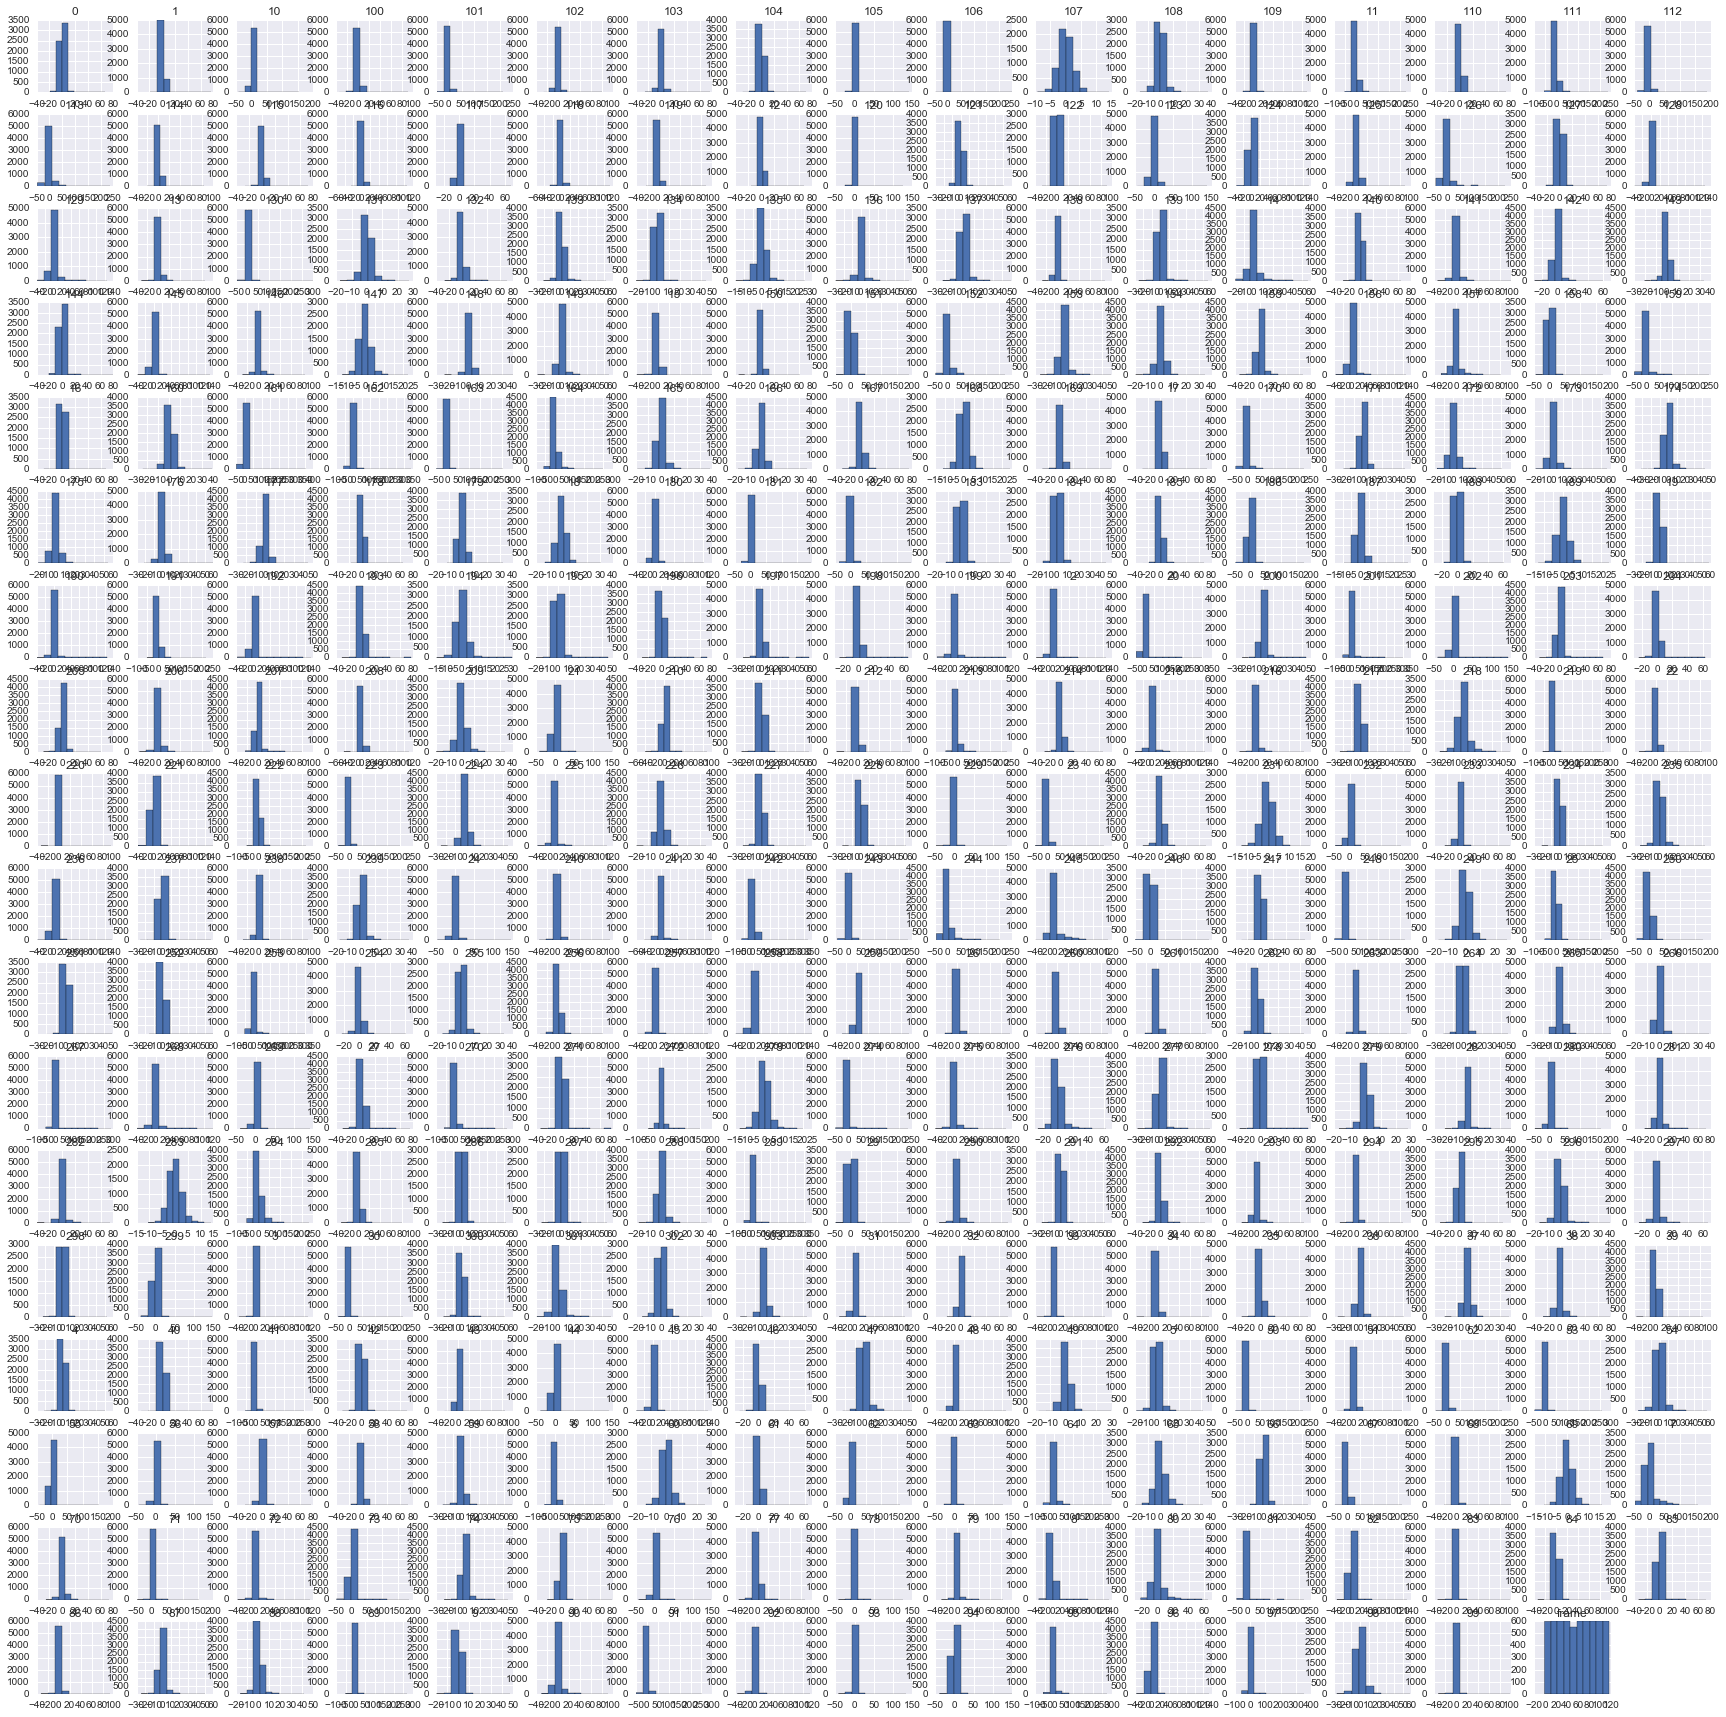

In [421]:
MeanSweeps.hist(figsize=[30,30]);

In [407]:
fullexpDF.to_csv('D:\BrainObservatory\ophys_analysis\%d_MeanSweep.csv')#%expID,index=False)

In [408]:
#groupedFrame=fullexpDF.groupby('frame')
#groupedFrame.last()
#type(groupedFrame)

In [409]:
#groupedFrame.get_group(1)

In [410]:
#SortedGF.iloc[:,1:]

In [419]:
#get_group pulls all trials/cells for a single stimulus i
for i in np.unique(framelist):
    SortedGF = fullexpDF[fullexpDF.frame==i]
#     SortedGF=groupedFrame.get_group(i)
    if i == -1:
        SortedGFD=pd.DataFrame(variation(SortedGF.iloc[:,1:],axis=0)).T
    if i >=0:
        tmp=(pd.DataFrame(variation(SortedGF.iloc[:,1:],axis=0))).T
        SortedGFD=SortedGFD.append(tmp,ignore_index=False)
SortedGFD.head()
#SortedGFData=SortedGFD.T

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,-3.870226,-2.395366,-18.118063,-3.386378,-1.746358,3.256890,9.915461,-12.087835,-2.606231,-2.104807,...,-1.794779,-2.678196,-4.727724,-3.332763,-2.408342,-2.548571,-1.644851,-2.347542,-5.366714,-7.729708
0,53.349755,9.351383,-14.865641,-3.027700,3.246505,-5.216804,-3.431377,-1.296359,4.556972,4.131670,...,-91.462586,-3.231320,5.642111,1.875184,9.304734,6.145834,11.459374,7.501280,7.002538,-2.930408
0,5.920664,4.175981,-2.951870,-15.771940,-35.653762,-3.758238,11.331037,9.537281,19.037945,9.275697,...,-4.495584,2.183997,-3.287627,1.928316,-6.064495,116.642843,-4.144918,6.741308,-20.761233,14.487237
0,4.027625,5.919206,-7.564522,-8.528895,-7.958616,-4.487465,-192.957148,-6.768369,-4.427819,-18.643442,...,-5.992306,18.346088,-4.607702,-10.310852,-7.521761,-3.052844,-21.019233,7.257796,-63.635970,8.939473
0,87.372580,3.370274,-38.208357,-88.567100,19.246224,5.578883,17.767738,4.826401,-43.383788,12.414596,...,6.003045,-6.015480,-27.930923,-9.953311,-37.536134,21.404917,-19.459713,5.638173,7.058757,-21.205175


In [412]:
Full=[CellSpecimenIDs,SortedGFData]
FinalDF=pd.concat(Full,axis=1,ignore_index=False)
#colnames = FinalDF.columns.tolist()
#colnames[colnames[0]] = 'Cell_Specimen_ID'
#FinalDF.columns=colnames
#FinalDF
#CellSpecimenIDs.head()
#df.columns = names

In [413]:
#time_stamps,traces=exp.get_corrected_fluorescence_traces()
#drg=exp.get_stimulus_table('natural_scenes')

In [414]:
#fig,ax=plt.subplots()
#cell_index=39
#for i in drg.start:
    #ax.plot(range(7),traces[cell_index,i:i+7])

In [415]:
SortedGFData.to_csv('D:\BrainObservatory\ophys_analysis\%d_SortedGFData.csv'%(expID),index=False)
FinalDF.to_csv('D:\BrainObservatory\ophys_analysis\%d_FinalCOV.csv'%(expID),index=False)

# Plot?

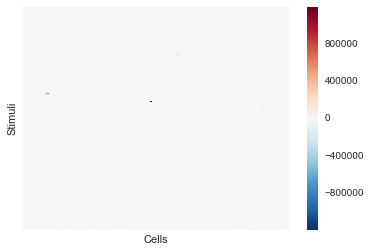

In [416]:
ax=seaborn.heatmap(SortedGFData,xticklabels=False,yticklabels=False)
plt.xlabel('Cells')
plt.ylabel('Stimuli')

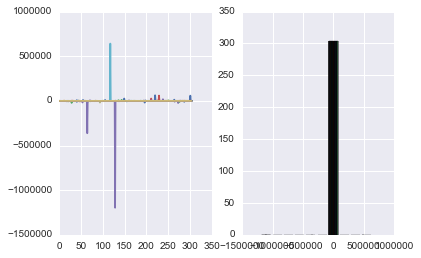

In [417]:
fig,ax=plt.subplots(ncols=2);

ax[0].plot(SortedGFData);
ax[1].hist(SortedGFData);